In [2]:
# cargamos las librerias necesarias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## **_1. Lectura (carga) de los Datos_**

In [3]:
# importamos archivo desde github (ojo que la rama se llama master)
df = pd.read_csv('https://raw.githubusercontent.com/ecdiazl/capstone-project/master/Data/df_final_pay_sin_mt.csv')

In [4]:
df.head()

,year_2023,year_2024,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,...,CAT 798-AC,KOM-CHQ,KOM.960E5,Kom.930E-4,Kom.930E-4SE,Kom.930EN,Kom.930ER,Kom.930ER-MT,Kom.980E5,Komatsu AHS
0,False,False,False,False,False,False,False,False,False,False,...,0.0,0.0,24.0,96.0,395.0,96.0,240.0,0.0,132.0,24.0
1,False,False,False,False,False,False,False,False,False,False,...,0.0,0.0,24.0,96.0,396.0,96.0,240.0,0.0,132.0,24.0
2,False,False,False,False,False,False,False,False,False,False,...,0.0,0.0,24.0,96.0,394.0,96.0,240.0,0.0,132.0,24.0
3,False,False,False,False,False,False,False,False,False,False,...,0.0,0.0,24.0,95.0,396.0,96.0,240.0,0.0,132.0,24.0
4,False,False,False,False,False,False,False,False,False,False,...,0.0,0.0,24.0,96.0,395.0,96.0,240.0,0.0,132.0,24.0


## **2. Preparamos el Dataset**

In [5]:
# transformamos las variables bool a categorical y le asignamos 0 o 1
for col in df.columns:
  if df[col].dtype == 'bool':
     df[col] = df[col].astype('category').cat.codes
     df[col] = df[col].astype('category') # para que quede como category y no como int8

In [6]:
df.head()

,year_2023,year_2024,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,...,CAT 798-AC,KOM-CHQ,KOM.960E5,Kom.930E-4,Kom.930E-4SE,Kom.930EN,Kom.930ER,Kom.930ER-MT,Kom.980E5,Komatsu AHS
0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,24.0,96.0,395.0,96.0,240.0,0.0,132.0,24.0
1,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,24.0,96.0,396.0,96.0,240.0,0.0,132.0,24.0
2,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,24.0,96.0,394.0,96.0,240.0,0.0,132.0,24.0
3,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,24.0,95.0,396.0,96.0,240.0,0.0,132.0,24.0
4,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,24.0,96.0,395.0,96.0,240.0,0.0,132.0,24.0


In [7]:
len(df.columns)

84

In [9]:
# seleccionamos las variables que vamos a usar
df_selected = df[['payload', 'year_2023', 'year_2024', 'month_3', 'month_5', 'month_6', 'month_7',
       'month_8', 'month_9', 'month_10', 'month_11', 'day_2', 'day_3', 'day_4',
       'day_5', 'day_6', 'day_10', 'day_11', 'day_13', 'day_15', 'day_16',
       'day_17', 'day_20', 'day_21', 'day_22', 'day_23', 'day_24', 'day_25',
       'day_26', 'day_27', 'day_28', 'day_30', 'day_31', 'shift_B', 'crew_E2',
       'crew_E3', 'crew_E4', 'efectivo', 'mantencion', 'mecanica', 'electrica',
       'mant_excl', 'mec_excl', 'demora', 'r_noprg', 'waiting', 'queued',
       'distance_down_level', 'distance_up', 'distance_up_level',
       'expected_time', 'lift_down', 'lift_down_level', 'lift_up',
       'lift_up_level', 'travel_time', 'CAT 797-F', 'CAT 798-AC', 'KOM-CHQ',
       'KOM.960E5', 'Kom.930E-4', 'Kom.930E-4SE', 'Kom.930ER-MT', 'Kom.980E5',
       'Komatsu AHS']]

In [10]:
len(df_selected.columns)

65

In [11]:
df_selected.payload.mean()

np.float64(142357.4639507874)

In [32]:
# agregamos columna de validación del promedio de la variable payload
df_selected['payload_validation'] = np.where(df_selected['payload'] >= df_selected.payload.mean(), 1, 0)

/var/folders/81/70tdhtkn6yzd7lv46bsjk7640000gn/T/ipykernel_66850/2444498298.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['payload_validation'] = np.where(df_selected['payload'] >= df_selected.payload.mean(), 1, 0)


In [33]:
df_selected.payload_validation

0       1
1       1
2       1
3       1
4       1
       ..
1562    0
1563    0
1564    0
1565    0
1566    0
Name: payload_validation, Length: 1567, dtype: int64

## **3. Análisis Exploratorio de Datos (EDA)**

### **3.1. Distance Up Level**

<Axes: xlabel='distance_up_level', ylabel='payload'>

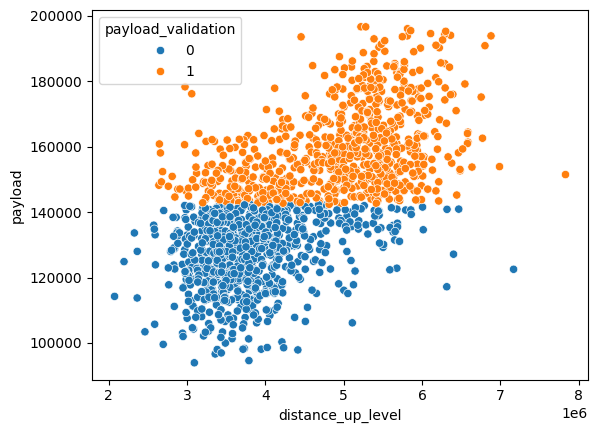

In [40]:
# relación entre distance_up_level y payload
sns.scatterplot(x='distance_up_level', y='payload', data=df_selected, hue='payload_validation')

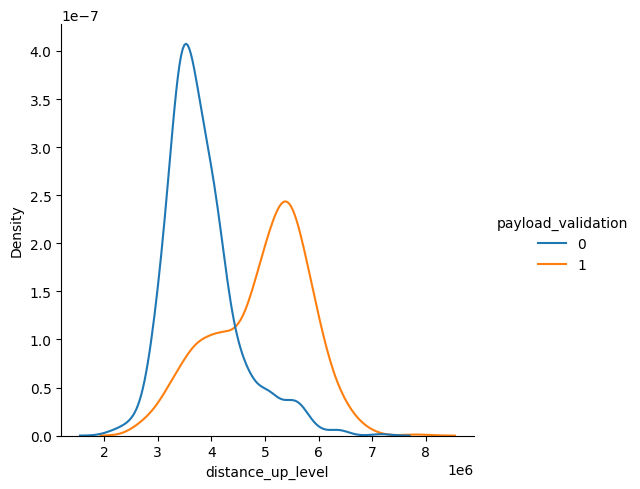

In [41]:
# graficamos la variable distance_up_level
sns.displot(data=df_selected, x='distance_up_level', hue='payload_validation', kind='kde')